## Model Based Collaborative Filtering -- SVD

Good explanations:
* __[Introduction to Recommender System by Steeve Huang](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)__
* __[The 4 Recommendation Engines That Can Predict Your Movie Tastes](https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223)__

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from sklearn import model_selection as model

import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings_small.csv')
movies = pd.read_csv('data/movies_small.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

/Users/chenhua/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


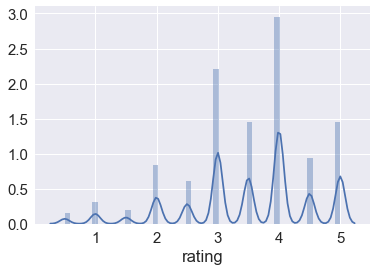

In [8]:
# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [9]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [10]:
train, test = model.train_test_split(ratings, test_size=0.2)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80668 entries, 84727 to 65785
Data columns (total 4 columns):
userId       80668 non-null int64
movieId      80668 non-null int64
rating       80668 non-null float64
timestamp    80668 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20168 entries, 35970 to 11059
Data columns (total 4 columns):
userId       20168 non-null int64
movieId      20168 non-null int64
rating       20168 non-null float64
timestamp    20168 non-null int64
dtypes: float64(1), int64(3)
memory usage: 787.8 KB


In [13]:
test.head()

,userId,movieId,rating,timestamp
35970,246,28,4.5,1354126962
10456,68,500,3.0,1158531950
3502,21,79592,3.5,1500701875
95232,600,810,1.5,1237760673
2909,19,3466,2.0,965704331


In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.loc[ratings.index.isin(test.index), 'rating'] = np.nan

In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,NaN,964982703
1,1,3,NaN,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
# format the ratings matrix to be one row per user and one column per movie
Ratings = ratings.pivot(index = 'userId', 
                        columns ='movieId', 
                        values = 'rating')
Ratings = Ratings.apply(lambda row: row.fillna(row.mean()), axis = 1)
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.377143,4.377143,4.377143,4.377143,4.377143,4.000000,4.377143,4.377143,4.377143,4.377143,...,4.377143,4.377143,4.377143,4.377143,4.377143,4.377143,4.377143,4.377143,4.377143,4.377143
2,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,...,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762,3.904762
3,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,...,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576,2.257576
4,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,...,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273,3.602273
5,4.000000,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,...,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568,3.567568


In [18]:
# # denormalize the ratings matrix
user_ratings_mean = np.array(ratings.groupby('userId')['rating'].mean())

In [19]:
# user_ratings_mean = pd.DataFrame(user_ratings_mean)
# user_ratings_mean.columns = ['mean']

In [20]:
R = Ratings.values
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [21]:
Ratings_demeaned

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.65      , -1.15      , -1.15      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33414161,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
U, sigma, Vt = svds(Ratings_demeaned, k = 50)
sigma = np.diag(sigma)

In [23]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [24]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,4.435948,4.353660,4.411458,4.377924,4.389329,4.275410,4.278092,4.372099,4.366699,4.233167,...,4.377143,4.377351,4.377054,4.377054,4.377203,4.377143,4.377203,4.377203,4.377203,4.378278
1,3.909513,3.900632,3.906942,3.904760,3.916303,3.903210,3.909235,3.907128,3.905547,3.905096,...,3.904762,3.904316,3.904952,3.904952,3.904634,3.904762,3.904634,3.904634,3.904634,3.904721
2,2.286486,2.321126,2.244981,2.258579,2.260970,2.306257,2.268337,2.274799,2.241648,2.271796,...,2.257576,2.257863,2.257453,2.257453,2.257658,2.257576,2.257658,2.257658,2.257658,2.257879
3,3.779794,3.480695,3.693569,3.572782,3.548628,3.785247,3.553933,3.573301,3.587660,3.751816,...,3.602273,3.604009,3.601532,3.601532,3.602771,3.602273,3.602771,3.602771,3.602771,3.609311
4,3.645633,3.537859,3.543861,3.561189,3.548853,3.636202,3.572576,3.560595,3.562217,3.557741,...,3.567568,3.567865,3.567441,3.567441,3.567653,3.567568,3.567653,3.567653,3.567653,3.568395


In [25]:
def recommend_movies(preds, userID, movies, original_ratings):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', 
                                 right_on = 'movieId').sort_values(['rating'], ascending=False))

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'movieId',
               right_on = 'movieId').rename(columns = {user_row_number: 'pred_rating'}).
                       sort_values('pred_rating', ascending = False))

    return user_full, recommendations

In [26]:
already_rated, predictions = recommend_movies(preds, 1, movies, ratings)

User 1 has already rated 232 movies.


In [27]:
# Top 20 movies that User 1 has rated 
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
118,1,2005,5.0,964981710,"Goonies, The (1985)",Action|Adventure|Children|Comedy|Fantasy
86,1,1275,5.0,964982290,Highlander (1986),Action|Adventure|Fantasy
167,1,2580,5.0,964983000,Go (1999),Comedy|Crime
166,1,2571,5.0,964981888,"Matrix, The (1999)",Action|Sci-Fi|Thriller
164,1,2529,5.0,964982242,Planet of the Apes (1968),Action|Drama|Sci-Fi
156,1,2427,5.0,964982242,"Thin Red Line, The (1998)",Action|Drama|War
153,1,2395,5.0,964981093,Rushmore (1998),Comedy|Drama
151,1,2387,5.0,964983123,Very Bad Things (1998),Comedy|Crime
149,1,2353,5.0,964983861,Enemy of the State (1998),Action|Thriller
147,1,2329,5.0,964983263,American History X (1998),Crime|Drama


In [28]:
# Top 20 movie recommendations that User 1 will enjoy
predictions.head(10)

,movieId,title,genres,pred_rating
615,858,"Godfather, The (1972)",Crime|Drama,4.585532
445,541,Blade Runner (1982),Action|Sci-Fi|Thriller,4.583407
4568,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.563282
1322,1961,Rain Man (1988),Drama,4.563066
259,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.547787
732,1028,Mary Poppins (1964),Children|Comedy|Fantasy|Musical,4.539943
283,344,Ace Ventura: Pet Detective (1994),Comedy,4.537943
3397,4979,"Royal Tenenbaums, The (2001)",Comedy|Drama,4.536793
863,1246,Dead Poets Society (1989),Drama,4.535986
294,357,Four Weddings and a Funeral (1994),Comedy|Romance,4.532124


## Model Evaluation

### RMSE

In [29]:
# def RMSE_recommend_movies(preds, userID, movies, original_ratings):
    
#     # Get and sort the user's predictions
#     user_row_number = userID - 1 # User ID starts at 1, not 0
#     sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)
    
#     # Get the user's data and merge in the movie information.
#     user_data = original_ratings[original_ratings.userId == (userID)]
#     user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', 
#                                  right_on = 'movieId').sort_values(['rating'], ascending=False))

# #     print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    
#     # Recommend the highest predicted rating movies that the user hasn't seen yet.
#     recommendations = (movies[movies['movieId'].isin(user_full['movieId'])].
#          merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'movieId',
#                right_on = 'movieId').rename(columns = {user_row_number: 'pred_rating'}))

#     return recommendations

In [30]:
# def RMSE(preds, original_ratings):
#     sizeN = original_ratings.shape[0]
#     err = 0
#     for userId in original_ratings.userId.unique():
#         err += np.dot(np.array(ratings[ratings.userId == userId]['rating']) - np.array(recommendations['pred_rating']), 
#                       np.array(ratings[ratings.userId == userId]['rating']) - np.array(recommendations['pred_rating']))
#     rmse = np.sqrt(err/sizeN)
#     return rmse

In [31]:
def RMSE(preds, test_ratings):
    sizeN = test_ratings.shape[0]
    err = 0
    for idx in test_ratings.index:
        userId = np.array(test_ratings.loc[test_ratings.index == idx]['userId'])[0]
        movieId = np.array(test_ratings.loc[test_ratings.index == idx]['movieId'])[0]
        rating = np.array(test_ratings.loc[test_ratings.index == idx]['rating'])[0]
        preditions = np.array(preds.loc[preds.index == userId - 1, preds.columns == movieId])[0]
        err += (rating - preditions)**2
    rmse = np.sqrt(err/sizeN)
    return rmse[0]

In [32]:
RMSE(preds, test)

0.9296874898810825